In [2]:
! gdown https://drive.google.com/u/0/uc?id=17WpSslT1bv81vHy3k1u0lo53_S10evDe

Downloading...
From: https://drive.google.com/u/0/uc?id=17WpSslT1bv81vHy3k1u0lo53_S10evDe
To: /content/CXR_Covid-19_Challenge.zip
3.61GB [00:55, 64.5MB/s]


In [3]:
! unzip -qq CXR_Covid-19_Challenge.zip

unzip:  cannot find or open CXR_Covid-19_Challenge.zip, CXR_Covid-19_Challenge.zip.zip or CXR_Covid-19_Challenge.zip.ZIP.


In [7]:
! gdown https://drive.google.com/u/0/uc?id=13S_GWX1f6K0ySqgeuQmH0pShhbTiT_EZ

Downloading...
From: https://drive.google.com/u/0/uc?id=13S_GWX1f6K0ySqgeuQmH0pShhbTiT_EZ
To: /content/test_set.zip
181MB [00:02, 74.7MB/s]


In [8]:
! unzip -qq test_set.zip

In [30]:
! mkdir test_set
! mv *.jpg test_set

In [65]:
# ! gdown https://drive.google.com/u/2/uc?id=1cpqqgbb77-1vt5-SvmQWV2Klla_tuLjD

# full
# ! gdown https://drive.google.com/u/0/uc?id=1Z3OmKjcj7BqwDjZLbTdoKpeP7GuoJryD


# validation
! gdown https://drive.google.com/u/1/uc?id=1EgtqKPWP2XzXpGWc8fXz2V19sjT5ORVW

Downloading...
From: https://drive.google.com/u/1/uc?id=1EgtqKPWP2XzXpGWc8fXz2V19sjT5ORVW
To: /content/CXR_Covid-19_100e_InceptionV3_500x500_1024-1024-3_val.h5
301MB [00:04, 69.6MB/s]


In [66]:
import glob
import cv2
import matplotlib.pyplot as plt

###########################
EPOCHS = 100
MODEL_NAME = 'InceptionV3'
IMG_SIZE = '500x500'
OUTPUT_LAYERS = '1024-1024-3'
###########################

In [9]:
all_covid_files = glob.glob('/content/train/covid/*')
all_normal_files = glob.glob('/content/train/normal/*')
all_pneumo_files = glob.glob('/content/train/pneumonia/*')
print(len(all_covid_files)," ",len(all_normal_files)," ",len(all_pneumo_files)," ")

6534   7151   4273  


In [10]:
# plot it in histogram


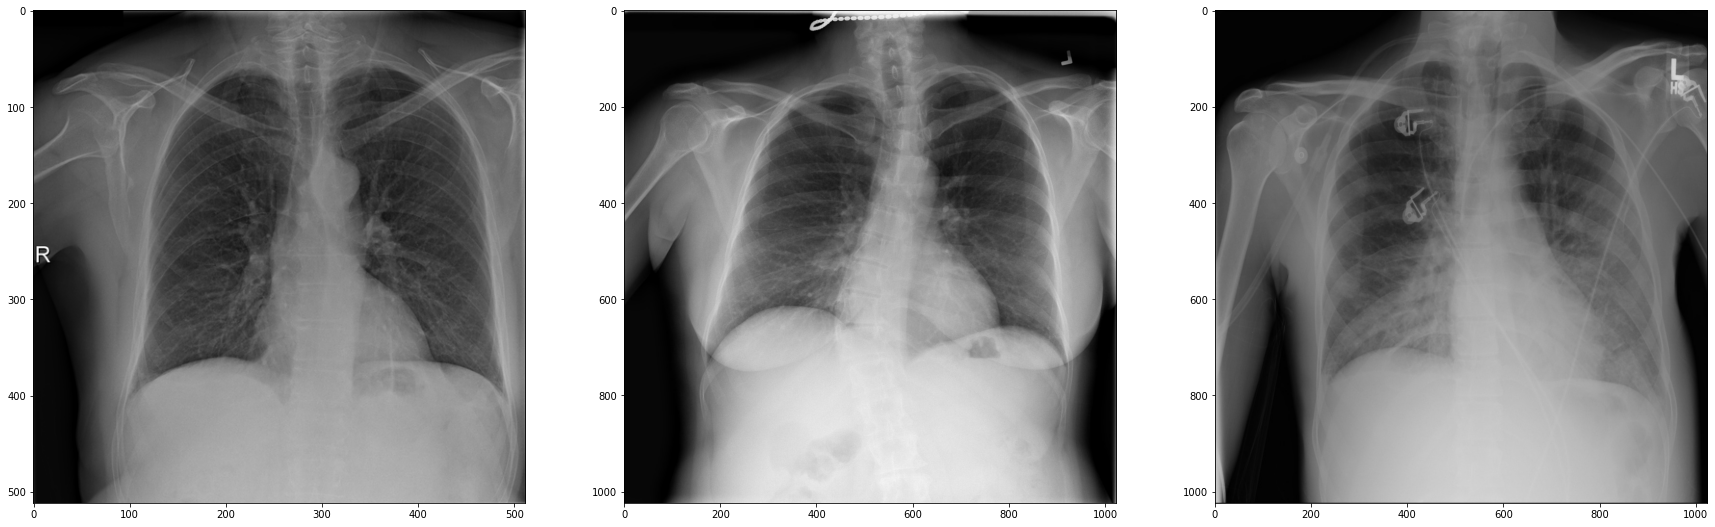

In [11]:

plt.figure(figsize=(30,10))
img_covid = cv2.imread(all_covid_files[0])
plt.subplot(1,3,1)
plt.imshow(img_covid)
img_normal = cv2.imread(all_normal_files[0])
plt.subplot(1,3,2)
plt.imshow(img_normal)
img_pneumo = cv2.imread(all_pneumo_files[0])
plt.subplot(1,3,3)
plt.imshow(img_pneumo)
plt.show()

In [12]:
print(img_pneumo.shape)
print(img_covid.shape)
print(img_normal.shape)

(1024, 1024, 3)
(512, 512, 3)
(1024, 1024, 3)


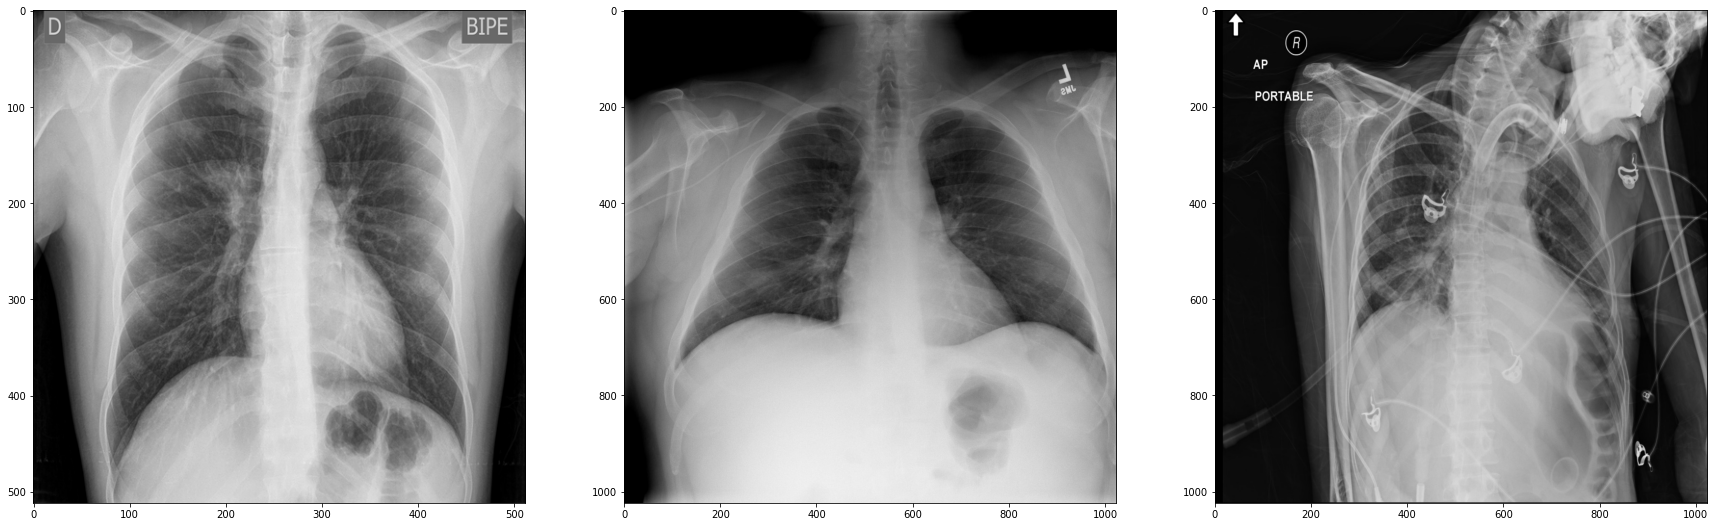

In [13]:

plt.figure(figsize=(30,10))
img_covid = cv2.imread(all_covid_files[1])
plt.subplot(1,3,1)
plt.imshow(img_covid)
img_normal = cv2.imread(all_normal_files[1])
plt.subplot(1,3,2)
plt.imshow(img_normal)
img_pneumo = cv2.imread(all_pneumo_files[1])
plt.subplot(1,3,3)
plt.imshow(img_pneumo)
plt.show()

In [67]:


from tensorflow.keras.utils import to_categorical
from PIL import Image

import pandas as pd
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import glob
import time
import cv2
import os
from tensorflow.keras.utils import to_categorical
from PIL import Image

import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D,\
                                    GlobalMaxPool2D, Dropout, SpatialDropout2D, add, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC, Precision, Recall, SensitivityAtSpecificity, PrecisionAtRecall, \
                                     TruePositives, TrueNegatives, FalsePositives, FalseNegatives


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras

import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import glob
import time
import cv2
import os



In [15]:

dir = glob.glob('train/*')
get_freq = {}
# count = 1
for item in dir:
  freq = len(glob.glob("{}/*".format(item)))
  print(freq)
  item_name  = item.split('/')[1]
  get_freq[item_name] = freq
  #get_freq[count] = freq
  #count += 1
  #get_freq.append(freq)


7151
4273
6534


In [24]:

# short_index = {}
# total_img_names = []
# short_labels = []
# for item in dir:
#   print(item)
#   img_names = glob.glob("{}/*".format(item))[:5]
#   print("img names = ",img_names[:10])
#   short_name = str(img_names[0].split('.')[0]).split('/')[2].split('_')[0]
#   short_index[short_name] = img_names[0].split('/')[1]
#   short_labels.append(short_name)
#   total_img_names.append(img_names)
# print(total_img_names)
# print(len(total_img_names))
# print(short_labels)
# print(short_index)
index = {'normal': 0, 'covid': 1,  'pneumonia': 2}
rev_index = {0: 'normal',1: 'covid', 2: 'pneumonia'}

In [57]:
# short_rev_index = {}
# for item in short_index:
#   short_rev_index[short_index[item]] = item
# print(short_rev_index)

# index = {}
# rev_index = {}
# count = 0
# for item in get_freq:
#   index[item] = count
#   rev_index[count] = item
#   count += 1 
# print(index)
# print(rev_index)

index = {'normal': 0, 'covid': 1,  'pneumonia': 2}
rev_index = {0: 'normal',1: 'covid', 2: 'pneumonia'}

# For submission => 0:covid, 1: normal , 2: pneu
sub_index = {1:0, 0:1, 2:2}
# rev_sub_index = {0:1, 1:0, 2:2}

In [18]:
def parse_filepath(filepath):
    try:
        #path, filename = os.path.split(filepath)
        label = filepath.split('/')[1]
        #filename, ext = os.path.splitext(filename)
        #label, _ = filename.split("_")
        return label
    except Exception as e:
        print('error to parse %s. %s' % (filepath, e))
        return None, None

In [35]:
np.random.seed(42)

H, W, C = 500, 500, 3
N_LABELS = len(index)
D = 1

files_train = glob.glob("train/*/*.*")
print("Total files train = ",len(files_train))


# create a pandas data frame of images, age, gender and race
attributes = list(map(parse_filepath, files_train))

df_train = pd.DataFrame(attributes)
df_train['file'] = files_train
df_train.columns = ['label', 'file']
df_train = df_train.dropna()
df_train.tail()


p = np.random.permutation(len(df_train))
train_idx = p[:len(df_train)]


Total files train =  17958


In [20]:
# for item in files_train:
#     if item.split('.')[-1] not in 'jpg' and item.split('.')[-1] not in 'png':
#         print(item)
#     # print(item.split('.')[-1])
#     # break

In [36]:

##################################
H, W, C = 500, 500, 3
N_LABELS = len(index)
D = 1
##################################

files_validation = glob.glob("validation/*/*.*")
print("Total files valid = ",len(files_validation))

# create a pandas data frame of images, age, gender and race
attributes = list(map(parse_filepath, files_validation))

df_val = pd.DataFrame(attributes)
df_val['file'] = files_validation
df_val.columns = ['label', 'file']
df_val = df_val.dropna()
df_val.tail()

print(len(df_val))
p = np.random.permutation(len(df_val))
test_idx = p[:len(df_val)]



Total files valid =  3432
3432


In [37]:
print('train count: %s,  test count: %s' % (
    len(train_idx),  len(test_idx)))


train count: 17958,  test count: 3432


In [ ]:
# for item in files_validation:
#     if item.split('.')[-1] not in 'jpg' and item.split('.')[-1] not in 'png':
#         print(item)
#     # print(item.split('.')[-1])
#     # break

In [38]:
from tensorflow.keras.applications import InceptionV3 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Flatten, GlobalAveragePooling2D


# Change the pretrained model name according to the given criteria

frozen = InceptionV3(weights="imagenet", input_shape=(500, 500,3), include_top=False)
frozen.summary()

trainable = frozen.output
trainable = GlobalAveragePooling2D()(trainable)
#print(trainable.shape)
trainable = Dense(1024, activation="relu")(trainable)
trainable = Dense(1024, activation="relu")(trainable)
trainable = Dense(N_LABELS, activation="softmax")(trainable)
model = Model(inputs=frozen.input, outputs=trainable)
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 249, 249, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 249, 249, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 249, 249, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [39]:
# https://stackoverflow.com/questions/55640149/error-in-keras-when-i-want-to-calculate-the-sensitivity-and-specificity
# add specificity and sensitivity here
# https://datascience.stackexchange.com/questions/33587/keras-custom-loss-function-as-true-negatives-by-true-negatives-plus-false-posit/40746#40746
# add some loss functions here

# Metrics
# https://www.sabinasz.net/unbalanced-classes-machine-learning/

from keras import backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())



opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy',
            #experimental_run_tf_function=False,
            metrics = ['accuracy', sensitivity, specificity]
            )



In [ ]:
# tf.keras.utils.plot_model(model, to_file='Model1.png')
# from IPython.display import Image
# Image(retina=True, filename='Model1.png')

In [40]:

from tensorflow.keras.utils import to_categorical
from PIL import Image

def get_data_generator(df, indices, for_training, batch_size=16):
    images, labels = [], []
    while True:
        # print("indices = ",indices)    
        # print("len indices = ",len(indices))
        for i in indices:
            r = df.iloc[i]
            # print(" r = ", r, " i = ",i)
            file, label = r['file'], r['label']
            # print("file, label = ",file, label)
            im_gray = Image.open(file).convert('L')
            # print("Shape = ",im_gray.shape)
            im_gray = im_gray.resize((500, 500))
            im = np.zeros(shape=(500, 500,3))
            
            im[:,:,0] = im_gray
            im[:,:,1] = im_gray
            im[:,:,2] = im_gray
            im = np.array(im) / 255.0

            # print(im.shape)
            images.append(im)
            # print(np.asarray([to_categorical(index[label], N_LABELS)]))
            # print(np.asarray([to_categorical(index[label], N_LABELS)]).shape)
            
            labels.append(to_categorical(index[label], N_LABELS))
            if len(images) >= batch_size:
                yield np.array(images), np.array(labels)
                images, labels = [], []
        # if not for_training:
        #     break

In [41]:


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
# batch_size = 100
# valid_batch_size = 32
batch_size = 8
valid_batch_size = 8
train_gen = get_data_generator(df_train, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df_val, test_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss'),
    #ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4)
]

# for storing logs into tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# history = model.fit(train_gen,
#                     steps_per_epoch=len(train_idx)//batch_size,
#                     epochs=5,
#                     callbacks=[tensorboard_callback,callbacks],
#                     validation_data=valid_gen,
#                     validation_steps=len(test_idx)//valid_batch_size)

In [ ]:
# # download the model in computer for later use
# model.save('CXR_Covid-19_{}e_{}_{}_{}.h5'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS))

In [69]:

from tensorflow import keras
# model = keras.models.load_model('CXR_Covid-19_100e_InceptionV3_500x500_1024-1024-3.h5', custom_objects={'specificity': specificity, 'sensitivity': sensitivity})
model = keras.models.load_model('CXR_Covid-19_100e_InceptionV3_500x500_1024-1024-3_val.h5', custom_objects={'specificity': specificity, 'sensitivity': sensitivity})

In [70]:
test_gen = get_data_generator(df_val, test_idx, for_training=False)
dict(zip(model.metrics_names, model.evaluate(test_gen, steps=len(test_idx))))

 108/3432 [..............................] - ETA: 25:41 - loss: 0.2745 - accuracy: 0.9682 - sensitivity: 0.9682 - specificity: 0.9841


KeyboardInterrupt



In [71]:
test_files = glob.glob('test_set/*.jpg')
print(len(test_files))
test_files = sorted(test_files)
test_files[:10]

1200


['test_set/0001.jpg',
 'test_set/0002.jpg',
 'test_set/0003.jpg',
 'test_set/0004.jpg',
 'test_set/0005.jpg',
 'test_set/0006.jpg',
 'test_set/0007.jpg',
 'test_set/0008.jpg',
 'test_set/0009.jpg',
 'test_set/0010.jpg']

In [72]:

from tensorflow.keras.utils import to_categorical
from PIL import Image
from tqdm import tqdm
# y_pred_list = []
# y_test_list = []

sub_dic = {}

for file_path in tqdm(test_files):
    file_name = file_path.split('/')[1]
    # print(file_name)
    # break

    im_gray = Image.open(file_path).convert('L')
    # print("Shape = ",im_gray.shape)
    im_gray = im_gray.resize((500, 500))
    im = np.zeros(shape=(500, 500, 3))

    im[:,:,0] = im_gray
    im[:,:,1] = im_gray
    im[:,:,2] = im_gray
    im = np.array(im) / 255.0
    
    y_pred = model.predict(im[np.newaxis, ...])
    # y_pred_list.append(int(tf.math.argmax(y_pred, axis=-1)))
    pred_val = sub_index[int(tf.math.argmax(y_pred, axis=-1))]
    sub_dic[file_name] = pred_val
    # y_test_list.append(index[label])
    # print("This = ",rev_index[int(tf.math.argmax(y_pred, axis=-1))])
    # print(to_categorical(index[label], N_LABELS))
    # print(pred_val)



    # break
    

100%|██████████| 1200/1200 [02:59<00:00,  6.69it/s]


In [74]:
toCSV = []

for item in sub_dic:
    # print(item, " , ",sub_dic[item])
    toCSV.append({'case': item, 'class':sub_dic[item]})

keys = toCSV[0].keys()

with open('submission.csv', 'w', newline='')  as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(toCSV)

In [61]:
# case, class
# import csv
# toCSV = [{'case':'001.png', 'class':0}, {'case':'002.png', 'class':1}]


# keys = toCSV[0].keys()

# with open('people.csv', 'w', newline='')  as output_file:
#     dict_writer = csv.DictWriter(output_file, keys)
#     dict_writer.writeheader()
#     dict_writer.writerows(toCSV)

In [ ]:

from tensorflow.keras.utils import to_categorical
from PIL import Image
from tqdm import tqdm
y_pred_list = []
y_test_list = []

for i in tqdm(test_idx):
    r = df_val.iloc[i]
    file_, label = r['file'], r['label']

    im_gray = Image.open(file_).convert('L')
    # print("Shape = ",im_gray.shape)
    im_gray = im_gray.resize((500, 500))
    im = np.zeros(shape=(500, 500, 3))

    im[:,:,0] = im_gray
    im[:,:,1] = im_gray
    im[:,:,2] = im_gray
    im = np.array(im) / 255.0
    
    y_pred = model.predict(im[np.newaxis, ...])
    y_pred_list.append(int(tf.math.argmax(y_pred, axis=-1)))
    #print(index[label])
    y_test_list.append(index[label])
    # print("This = ",rev_index[int(tf.math.argmax(y_pred, axis=-1))])
    # print(to_categorical(index[label], N_LABELS))
    # print(label)
    

100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


In [ ]:
import pickle

with open('y_test_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'wb') as f:
    pickle.dump(y_test_list, f)
with open('y_pred_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'wb') as f:
    pickle.dump(y_pred_list, f)


In [ ]:
with open('y_test_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'rb') as f:
    y_test_list = pickle.load(f)
with open('y_pred_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'rb') as f:
    y_pred_list = pickle.load(f)
# y_test_list, y_pred_list

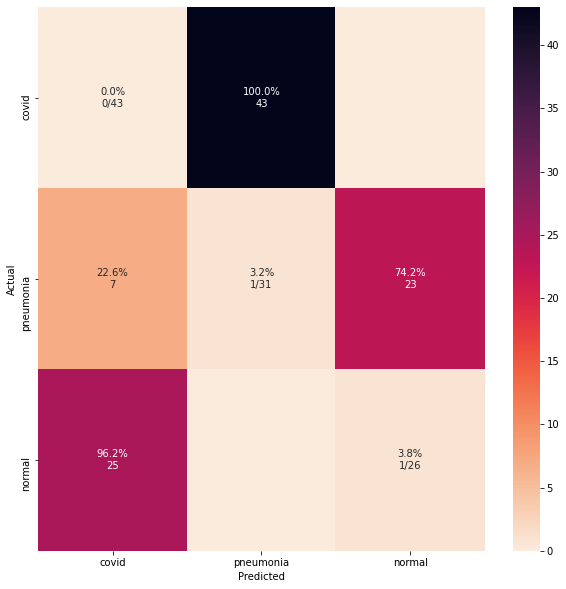

In [ ]:


from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test_list, y_pred_list)
report = classification_report(y_test_list, y_pred_list)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=[rev_index[i] for i in rev_index], columns=[rev_index[i] for i in rev_index])
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='rocket_r')
    #plt.savefig(filename)
    plt.savefig('confusion_matrix_CXR_Covid-19_{}e_{}_{}_{}.png'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS))
    plt.savefig('confusion_matrix_CXR_Covid-19_{}e_{}_{}_{}.eps'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS))
    #plt.show()

cm_analysis(y_test_list, y_pred_list, [i for i in rev_index] , ymap=None, figsize=(10,10))

In [ ]:
[i for i in rev_index]
[rev_index[i] for i in rev_index]

['covid', 'pneumonia', 'normal']

In [ ]:
with open('report_CXR_Covid-19_{}e_{}_{}_{}.txt'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(report)
    #sys.stdout = original_stdout # Reset the standard output to its original value



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mv /content/CXR_Covid-19_10e_Vgg16.h5 /content/drive/MyDrive/BraTS21/